In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle

import numpy as np
import sciplots as plots
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [3]:
with open('../data/bahamas_cdm.pkl', 'rb') as file:
    cdm_labels, cdm_images = pickle.load(file)

with open('../data/bahamas_0.1.pkl', 'rb') as file:
    sidm01_labels, sidm01_images = pickle.load(file)

with open('../data/bahamas_1.pkl', 'rb') as file:
    sidm1_labels, sidm1_images = pickle.load(file)

with open('../data/flamingo.pkl', 'rb') as file:
    flamingo_labels, flamingo_images = pickle.load(file)

with open('../data/bahamas_dmo_cdm.pkl', 'rb') as file:
    dmo_cdm_labels, dmo_cdm_images = pickle.load(file)

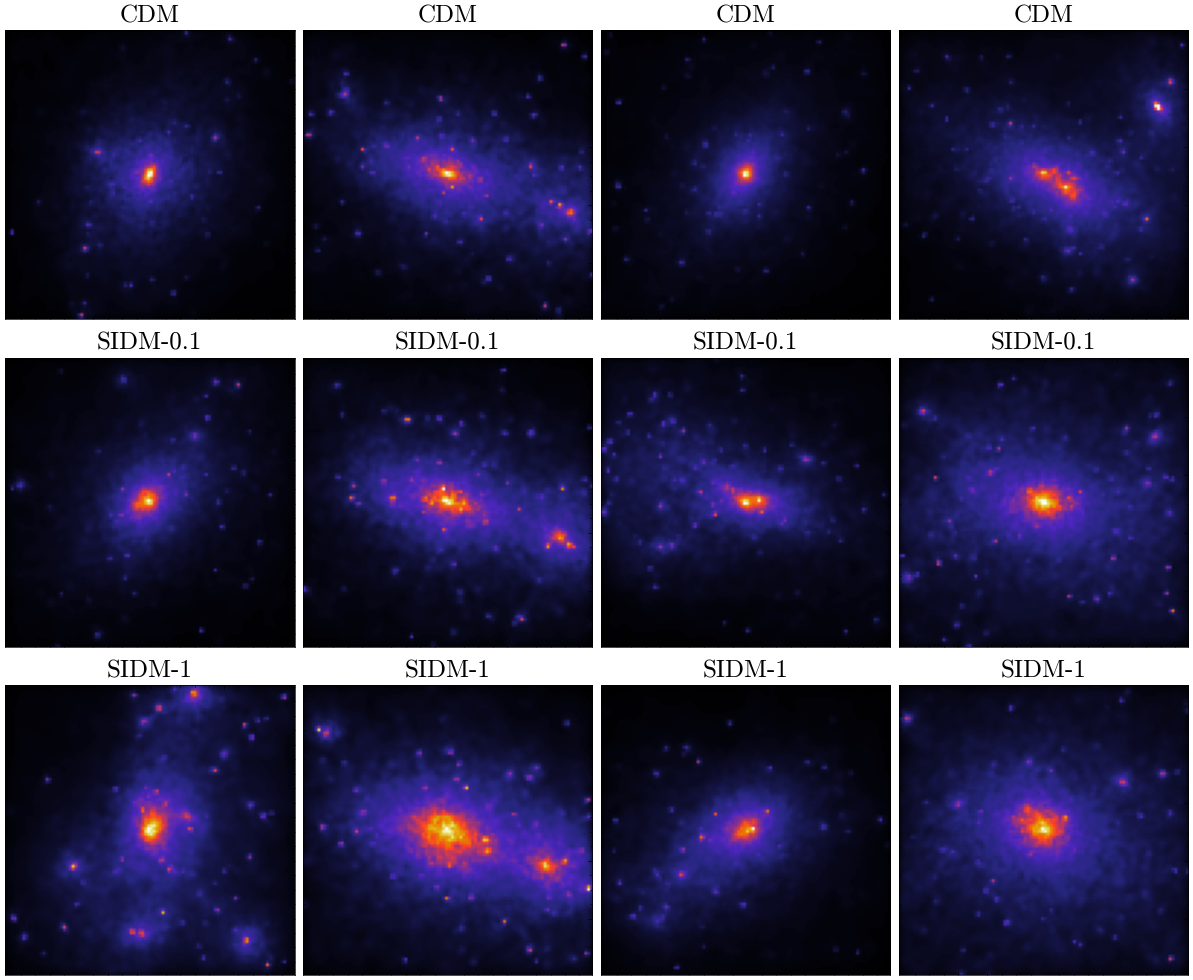

In [4]:
num = 4
idxs01 = np.isin(sidm01_labels['redshift'], cdm_labels['redshift'][:num]) & np.isin(sidm01_labels['projection'], cdm_labels['projection'][:num])
idxs01 = np.argmin(np.abs(cdm_labels['mass'][:4, None] - sidm01_labels['mass'][None, idxs01]), axis=-1)
idxs1 = np.isin(sidm1_labels['redshift'], cdm_labels['redshift'][:num]) & np.isin(sidm1_labels['projection'], cdm_labels['projection'][:num])
idxs1 = np.argmin(np.abs(cdm_labels['mass'][:4, None] - sidm1_labels['mass'][None, idxs1]), axis=-1)
images = np.concat((cdm_images[:num, 0], sidm01_images[idxs01, 0], sidm1_images[idxs1, 0]), axis=0)

plot = plots.PlotImages(
    images,
    cmaps='CMRmap',
    fig_size=(12, 10),
    ranges=[np.min(images), np.max(images)],
    titles=['CDM'] * num + ['SIDM-0.1'] * num + ['SIDM-1'] * num,
)

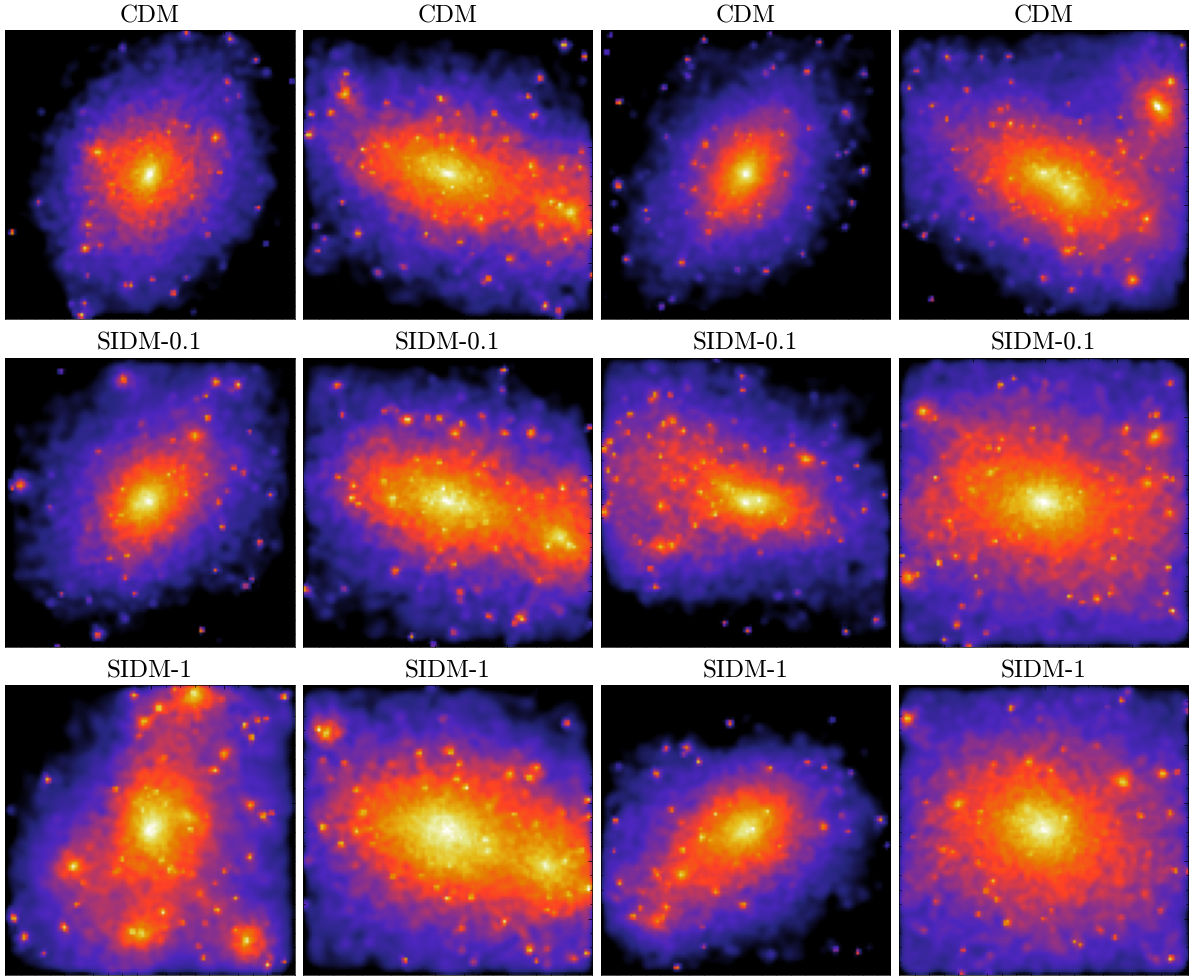

In [5]:
plot = plots.PlotImages(
    np.log(images),
    cmaps='CMRmap',
    fig_size=(12,10),
    ranges=[-4.2, np.log(np.max(images))],
    titles=['CDM'] * num + ['SIDM-0.1'] * num + ['SIDM-1'] * num,
)

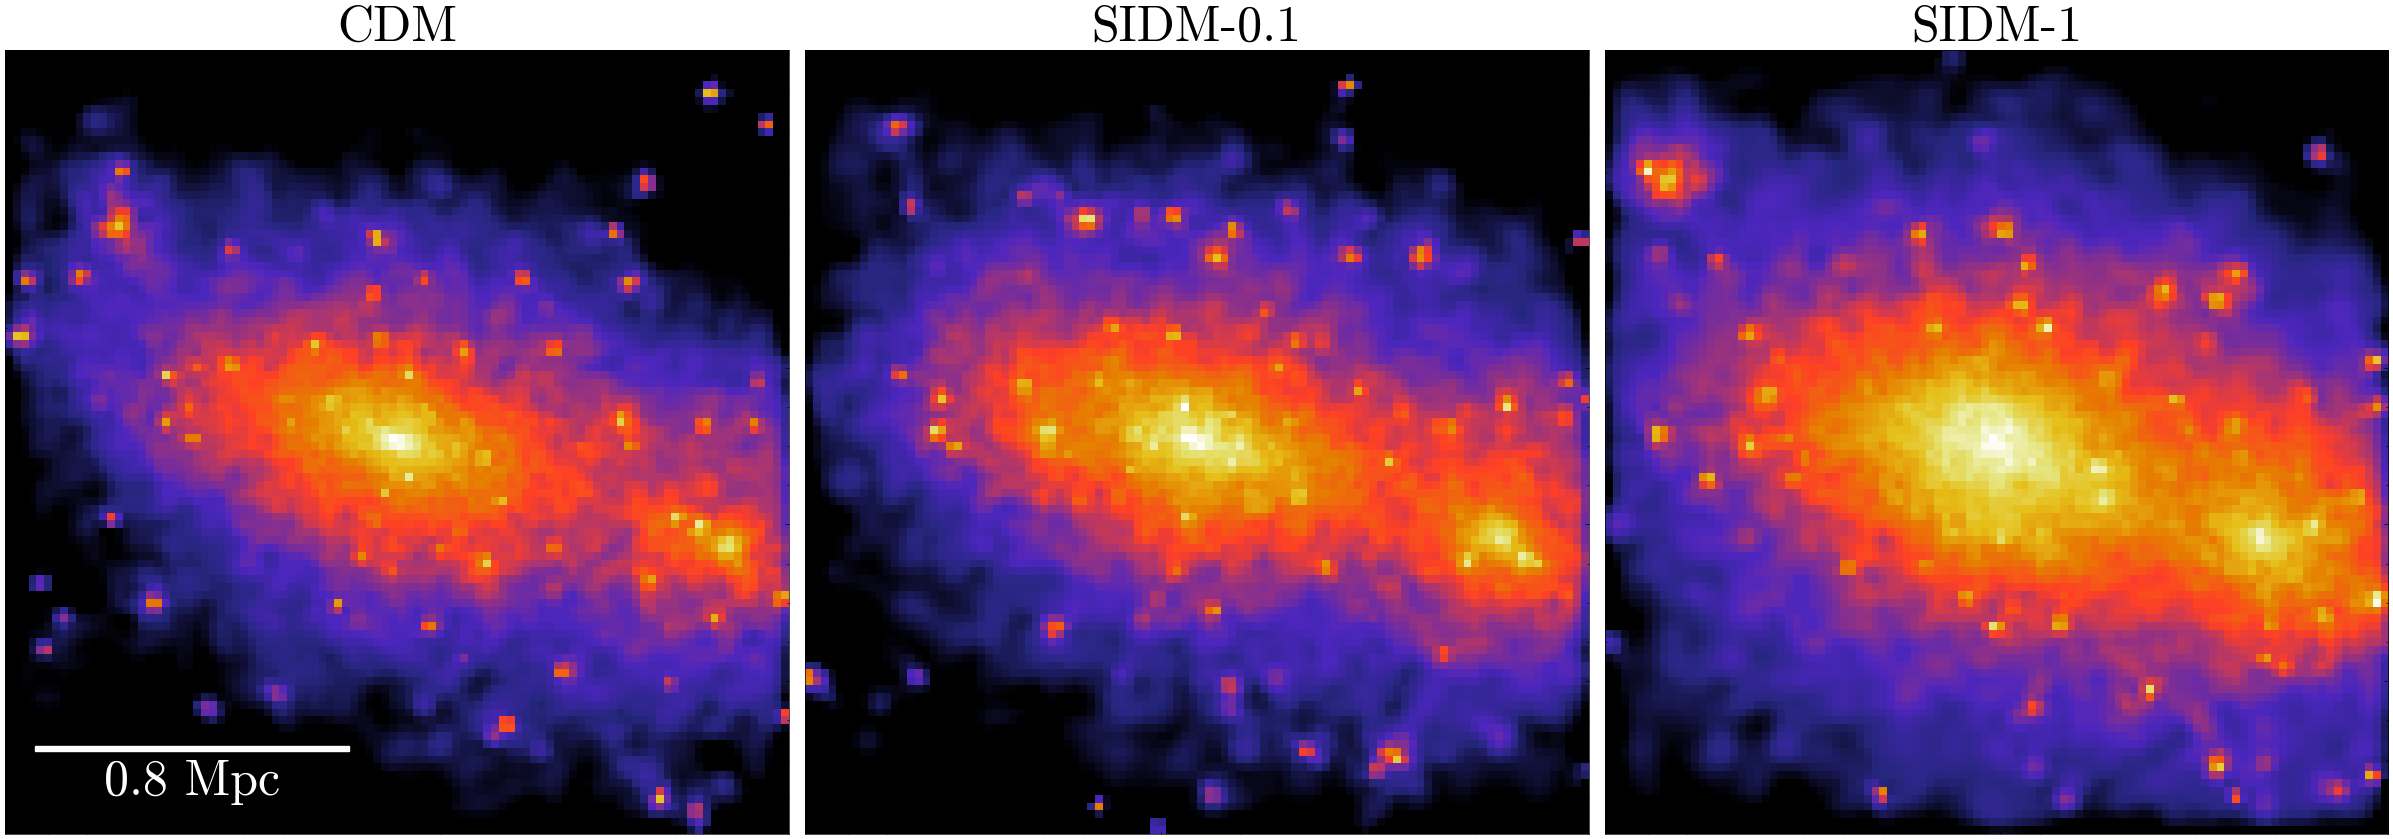

In [13]:
size = 40
# ranges = list(zip(*(np.log(np.quantile(images[1::4], 0.1, axis=(1, 2))), np.log(np.max(images[1::4], axis=(1, 2))))))
ranges = (np.log(np.quantile(images[1::4], 0.2)), np.log(np.max(images[1::4])))

plot = plots.PlotImages(
    np.log(images[1::4]),
    cmaps='CMRmap',
    fig_size=(24,20),
    ranges=ranges,
    titles=['CDM', 'SIDM-0.1', 'SIDM-1'],
)
scalebar = AnchoredSizeBar(
    plot.axes[0].transData,
    size,
    f'{20e-3 * size} Mpc',
    loc='lower left',
    color='w',
    pad=0.5,
    sep=5,
    size_vertical=0.6,
    frameon=False,
    fontproperties={'size': plot._major},
)
plot.axes[0].add_artist(scalebar)

In [14]:
plot.savefig('../plots/', name='sidm_comparison')

In [4]:
np.concat((cdm_images[0], sidm1_images[0], flamingo_images[0], dmo_cdm_images[0]), axis=0).shape

(13, 100, 100)

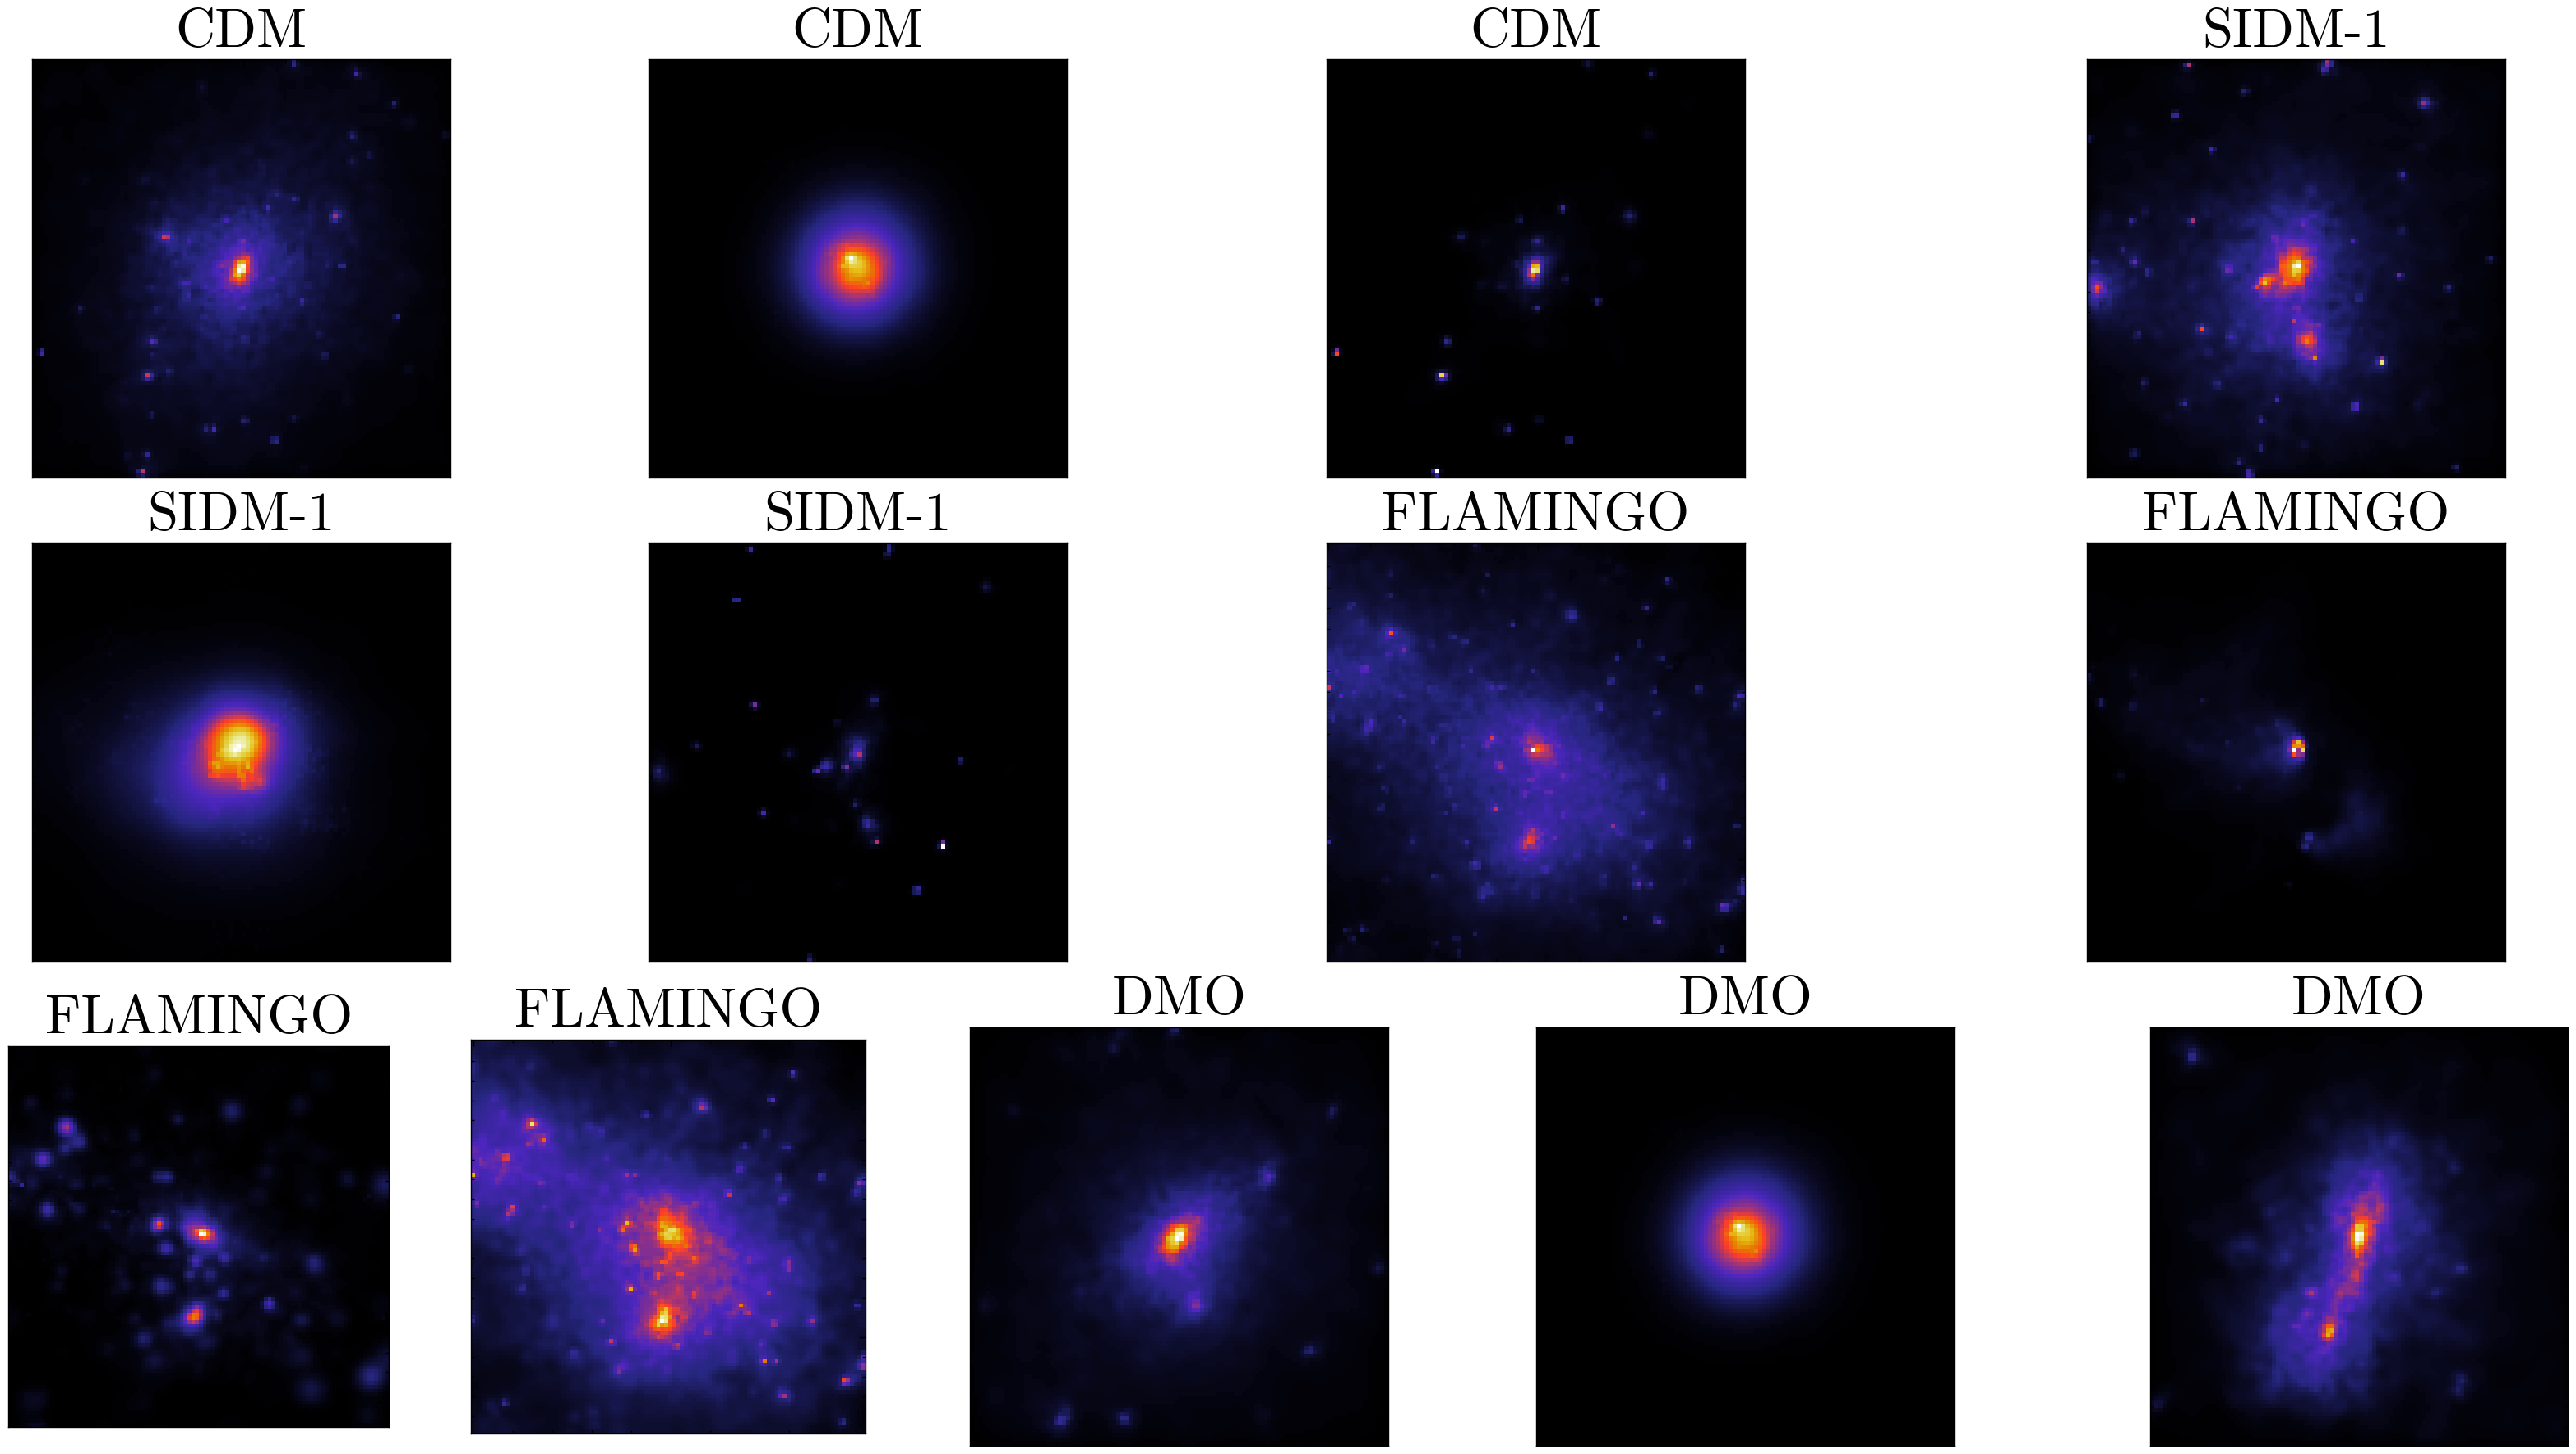

In [12]:
plot = plots.PlotImages(
    np.concat((cdm_images[0], sidm1_images[0], flamingo_images[0], dmo_cdm_images[0]), axis=0),
    num_plots=100,
    cmaps='CMRmap',
    titles=['CDM'] * cdm_images.shape[1] + ['SIDM-1'] * sidm1_images.shape[1] + ['FLAMINGO'] * flamingo_images.shape[1] + ['DMO'] * dmo_cdm_images.shape[1],
)